# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Mahika Bansal

EID: mb62835

Name:

EID:

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer: 

a) This term represents the bias of the estimator. It compares the expected value of the estimator with respect to predicted values.

b) Bias refers to the loss introduced by utilising an erroneous model for data prediction. It compares the predicted values to actual values. Variance refers to the error introduced by training a model that is highly sensitive to the data and sometimes even models the random noise. To keep a check on model accuracy on test data, a trafeoff is required when modelling on train data that captures the patterns in the data without being too fixated on a simple model and doesn't capture noise. 

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [204]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [205]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data
    
    #function to find polynomic model predictions and fit
    def polymodel(deg):
        x_train2 = np.vander(np.squeeze(x_train), deg+1)
        x_test2 = np.vander(np.squeeze(x_test), deg+1)
        x_all2 = np.vander(np.squeeze(x_all), deg+1)
        lrp.fit(x_train2, y_train)
        yptrain = lrp.predict(x_train2)
        ypall = lrp.predict(x_all2)
        yptest = lrp.predict(x_test2)
        msetrain = mean_squared_error(y_train, yptrain)
        msetest = mean_squared_error(y_test, yptest)
        return yptrain, ypall, yptest, msetrain, msetest
    
    train_rmse = [polymodel(2)[3],polymodel(4)[3],polymodel(7)[3]]
    test_rmse = [polymodel(2)[4],polymodel(4)[4],polymodel(7)[4]]
    
    # Print out the mean squared error (on both train and test sets) for all the models
    print("For 2nd degree polynomial model, MSE for train data:", polymodel(2)[3], " ,for test data:", polymodel(2)[4])
    print("For 4th degree polynomial model, MSE for train data:", polymodel(4)[3], " ,for test data:", polymodel(4)[4])
    print("For 7th degree polynomial model, MSE for train data:", polymodel(7)[3], " ,for test data:", polymodel(7)[4])
    
    # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 
    degree = [2,4,7]
    plt.scatter(x_train,y_train,label="Train Data",color = 'green')
    plt.scatter(x_test,y_test,label="Test Data",color = 'black')
    plt.scatter(x_test,polymodel(2)[2],label = "Predictions",color = 'red')
    plt.scatter(x_test,polymodel(4)[2],color = 'red')
    plt.scatter(x_test,polymodel(7)[2],color = 'red')
    plt.plot(x_all,polymodel(2)[1],linewidth = 2,label = "2nd degree", color = 'orange')
    plt.plot(x_all,polymodel(4)[1],linewidth = 2,label = "4th degree", color = 'purple')
    plt.plot(x_all,polymodel(7)[1],linewidth = 2,label = "7th degree", color = 'turquoise')
    plt.legend()
    plt.xlabel("Inputs (X's)")
    plt.ylabel("Outputs (Y's)")
    plt.show()
    
    return train_rmse,test_rmse

For 2nd degree polynomial model, MSE for train data: 247.29679797371534  ,for test data: 320.0640834697786
For 4th degree polynomial model, MSE for train data: 31.72001805729004  ,for test data: 31.292082886606718
For 7th degree polynomial model, MSE for train data: 30.677193592109738  ,for test data: 33.410694077690145


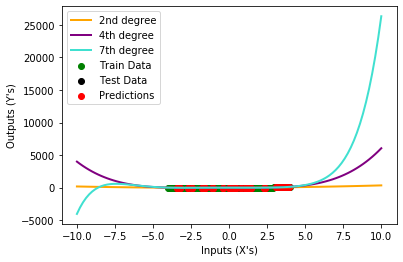

In [206]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

#### b) The polynomial with degree 4 gives the lowest test error. This shows that model 2 has optimum bias-variance tradeoff, i.e. it's not as simple as 2nd degree model thus less on bias, and also is not as flexible as the 7th degree model, thus not capturing the errors present in the dataset.

20% data
For 2nd degree polynomial model, MSE for train data: 161.17147378830043  ,for test data: 402.3231269099288
For 4th degree polynomial model, MSE for train data: 35.1151131391298  ,for test data: 38.34074498344275
For 7th degree polynomial model, MSE for train data: 22.543946691373325  ,for test data: 135.20764526756736


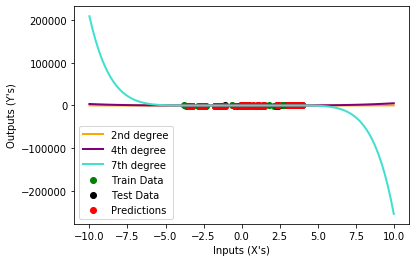

40% data
For 2nd degree polynomial model, MSE for train data: 150.33251286085704  ,for test data: 405.80516696165745
For 4th degree polynomial model, MSE for train data: 31.6245296464469  ,for test data: 33.16428295918744
For 7th degree polynomial model, MSE for train data: 25.492718751653634  ,for test data: 61.237418845510426


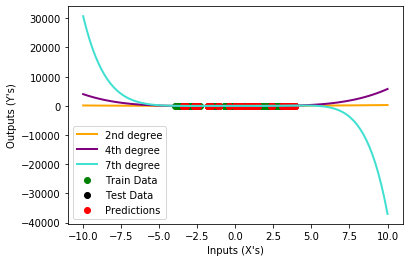

60% data
For 2nd degree polynomial model, MSE for train data: 150.08383759141728  ,for test data: 403.2513784833407
For 4th degree polynomial model, MSE for train data: 29.1928057399479  ,for test data: 31.781415416196726
For 7th degree polynomial model, MSE for train data: 26.099088642454408  ,for test data: 60.16667237664542


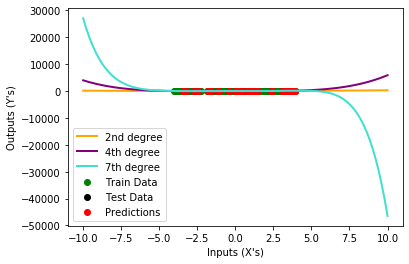

80% data
For 2nd degree polynomial model, MSE for train data: 168.1188246150281  ,for test data: 407.59369688184694
For 4th degree polynomial model, MSE for train data: 29.305108483323444  ,for test data: 32.518106868742585
For 7th degree polynomial model, MSE for train data: 26.549129596283638  ,for test data: 48.0769352971077


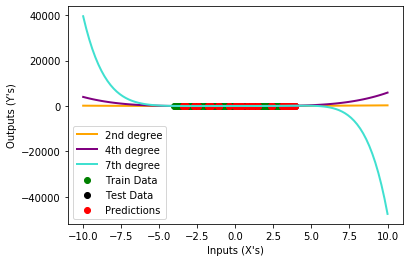

100% data
For 2nd degree polynomial model, MSE for train data: 247.29679797371534  ,for test data: 320.0640834697786
For 4th degree polynomial model, MSE for train data: 31.72001805729004  ,for test data: 31.292082886606718
For 7th degree polynomial model, MSE for train data: 30.677193592109738  ,for test data: 33.410694077690145


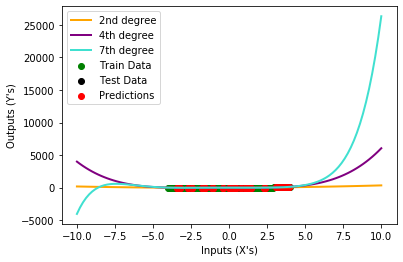

In [207]:
# c) 
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

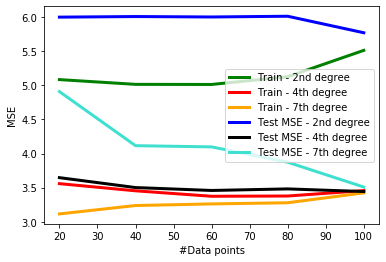

In [208]:
# plot MSE curves for each polynomial:
proportion = [20,40,60,80,100]
train_rmse = np.array([train_rmses_20, train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100]).T
test_rmse = np.array([test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100]).T

plt.plot(proportion,np.log(train_rmse[0]),linewidth = 3, label="Train - 2nd degree",color = 'green')
plt.plot(proportion,np.log(train_rmse[1]),linewidth = 3, label="Train - 4th degree",color = 'red')
plt.plot(proportion,np.log(train_rmse[2]),linewidth = 3, label="Train - 7th degree",color = 'orange')
plt.plot(proportion,np.log(test_rmse[0]),linewidth = 3,label = "Test MSE - 2nd degree", color = 'blue')
plt.plot(proportion,np.log(test_rmse[1]),linewidth = 3,label = "Test MSE - 4th degree", color = 'black')
plt.plot(proportion,np.log(test_rmse[2]),linewidth = 3,label = "Test MSE - 7th degree", color = 'turquoise')
plt.legend()
plt.xlabel("#Data points")
plt.ylabel("MSE")
plt.show()

#### c) The test and train error for all the models seems to converge when we use all the data points, proving that more the data more the test error will be similar to train error, i.e. fitting of a more accurate model. For polynomial with degree 2 the MSE seemes to be maximum out of all models, whereas for degree 4 model, the test and train error are lowest and seem to be almost similar to each other, no matter what proportion of data is used. This highlights that degree 4 model can be very close to the actual underlying model. For model with degree 7, the test error seems to reduce with increasing data points which shows that if we add more data even a higher degree model can be plausible.

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

a) In Gradient Descent, we run it over all the samples present in the given dataset to update weights for a parameter in each iteration. It's good for error minimization but can be computationally expensive, time consuming and takes time to converge. Also, we might converge at a local minima. But in stochastic gradient descent, a small subset or a sample of data is used to update weights in a single iteration. This gives a good enough approximation of the optimal weights and converges much faster. The noise added helps to come out of local minima and reach global minima.

b) Nelder-Mead method is an optmization technique. It considers two points very close to each other and keeps on moving in the direction farther away from the larger value.The problems associated are lack of convergence (as cannot get closer to the true minima than a step's distance) and slow convergence (in case learning rate or step size is small). To overcome this, this method also alters the step length: bigger when the loss at new point is better than the old point and smaller when it's worse off. Also it doesn't perform well with higher dimension functions, as it becomes difficult to decide the direction of the step in case of multiple dimensions.


# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

Error(E): $$ \frac{1}{2}\sum_{i=1}^{n}(y_i-\hat{y_i}) $$ = $$ \frac{1}{2}\sum_{i=1}^{n}(y_i-\hat{\omega_0}-\hat{\omega_1}x_1-\hat{\omega_2}x_1x_2-\hat{\omega_3}e^{-x_1})^{2} $$

Now calculating the partial derivatives, to find the gradient:
$$ \frac{\partial }{\partial \hat{\omega_0} }E = 
\sum_{i=1}^{n}{y_i}-\hat{y_i}=
y-\hat{y} $$
$$ \frac{\partial }{\partial \hat{\omega_1} }E = 
\sum_{i=1}^{n}x_1({y_i}-\hat{y_i})=
x_1(y-\hat{y}) $$
$$ \frac{\partial }{\partial \hat{\omega_2} }E = 
\sum_{i=1}^{n}x_1x_2({y_i}-\hat{y_i})=
x_1x_2(y-\hat{y}) $$
$$ \frac{\partial }{\partial \hat{\omega_3} }E = 
\sum_{i=1}^{n}e^{-x_1}({y_i}-\hat{y_i})=
e^{-x_1}(y-\hat{y}) $$

To update the weights, we multiply gradient with learning rate to calculate the step:
$$ \omega_{i} = \omega_{i} -\eta (\bigtriangledown E) $$

In case of our loss function, the updated weights would be given as:
$$ {\omega_0}^{t+1}=\omega_0^{t}-\eta (\hat{y}-y) $$
$$ {\omega_1}^{t+1}=\omega_1^{t}-\eta (x_1(\hat{y}-y)) $$
$$ {\omega_2}^{t+1}=\omega_2^{t}-\eta (x_1x_2(\hat{y}-y)) $$
$$ {\omega_3}^{t+1}=\omega_3^{t}-\eta (e^{-x_1}(\hat{y}-y)) $$

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [214]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [210]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        
        
    def sgd(self, gradient):
        #please put your codes here to update the self.coef using SGD
        self.coef = self.coef - self.learning_rate*gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        self.coef = np.zeros(4)
        mse = []
        coefs = []
        X = self.get_features(Regression,X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please put your codes here
                loss = self.linearPredict(Regression,X[i]) - y[i]
                # Compute gradients
                    #please put your codes here
                gradient = loss*X[i] + 2*self.regularization*self.coef
                # Update weights
                self.sgd(Regression,gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(Regression,X)         
            mse.append(np.mean(residuals**2))
        
        
        self.lowest_mse = mse[-1]
        
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
      
        return self.lowest_mse
            
    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
        return np.matmul(X,self.coef)
    
    #return None #this line is just a placeholder, please delete this line in your code  

In [211]:
data = pd.read_csv('SGD_samples-1.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]
mse_table = pd.DataFrame(columns=["Learning_Rate","Regularization","MSE"])

for i in range(len(learning_rate)):
    for j in range(len(regularization)):
        Regression.__init__(Regression,learning_rate[i],regularization[j],n_epochs)
        mse = Regression.fit(Regression,X,y)
        mse_table = mse_table.append(pd.DataFrame([[learning_rate[i],regularization[j],mse]],columns=["Learning_Rate","Regularization","MSE"]),ignore_index=True)
    
mse_table = mse_table.sort_values(by="MSE")
mse_table

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in square
C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in add
C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract
C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in multiply
C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: overflow encountered in matmul
C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply
C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in multiply


,Learning_Rate,Regularization,MSE
6,0.0100,0,2.739109e-02
3,0.0010,0,3.049599e-02
9,0.1000,0,3.098763e-02
0,0.0001,0,3.682051e-02
7,0.0100,10,5.815026e-02
4,0.0010,10,5.982713e-02
1,0.0001,10,5.985460e-02
5,0.0010,100,6.399338e-02
2,0.0001,100,6.417758e-02
8,0.0100,100,2.109366e+120


1st best model has MSE: 0.027391087575201013  for learning rate: 0.01  and regularization parameter: 0


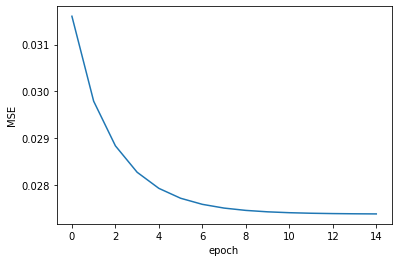

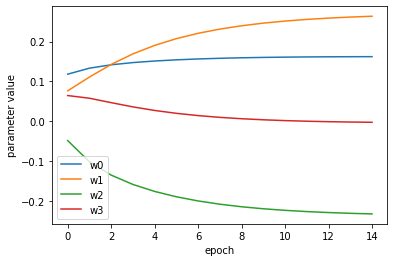

In [212]:
Regression.__init__(Regression,mse_table.iloc[0,0],mse_table.iloc[0,1],n_epochs)
mse = Regression.fit(Regression,X,y, plot = True)
print("1st best model has MSE:", mse_table.iloc[0,2]," for learning rate:", mse_table.iloc[0,0], " and regularization parameter:",mse_table.iloc[0,1])

2nd best model has MSE: 0.03049599152007353  for learning rate: 0.001  and regularization parameter: 0


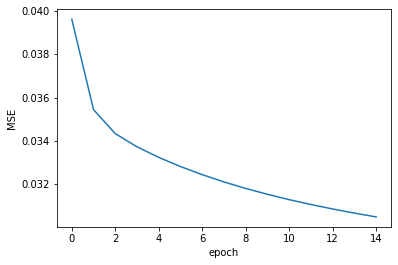

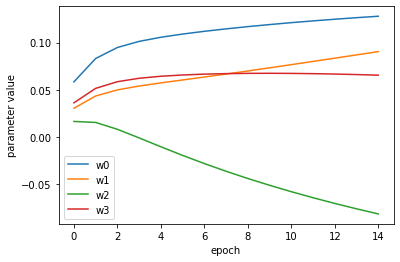

In [213]:
Regression.__init__(Regression,mse_table.iloc[1,0],mse_table.iloc[1,1],n_epochs)
mse = Regression.fit(Regression,X,y, plot = True)
print("2nd best model has MSE:", mse_table.iloc[1,2]," for learning rate:", mse_table.iloc[1,0], " and regularization parameter:",mse_table.iloc[1,1])